In [3]:
import numpy as np
import numpy_indexed as npi

In [3]:
def first_pos(grid, start):
    pos1, pos2 = None, None
    if grid[start[0]-1,start[1]] in {'|', '7', 'F'}: #up
        # print('up')
        pos1 = start - (1,0)
    if grid[start[0]+1,start[1]] in {'|', 'J', 'L'}: #down
        # print('down')
        if pos1 is None:
            pos1 = start + (1,0)
        else:
            pos2 = start + (1,0)
    if grid[start[0],start[1]+1] in {'-', 'J', '7'}: #right
        # print('right')
        if pos1 is None:
            pos1 = start + (0,1)
        else:
            pos2 = start + (0,1)
    if grid[start[0],start[1]-1] in {'-', 'L', 'F'}: #left
        # print('left')
        pos2 = start - (0,1)
    if pos1 is None or pos2 is None:
        raise ValueError("One or both pos variables not set")
    return pos1,pos2

def evol_step(grid, pos, pre_pos):
    # print(grid[tuple(pos)])
    if grid[tuple(pos)] == '|':
        next = np.array((pos+(1,0),pos-(1,0)))
    elif grid[tuple(pos)] == '-':
        next = np.array((pos+(0,1),pos-(0,1)))
    elif grid[tuple(pos)] == 'L':
        next = np.array((pos+(0,1),pos-(1,0)))
    elif grid[tuple(pos)] == 'J':
        next = np.array((pos-(0,1),pos-(1,0)))
    elif grid[tuple(pos)] == '7':
        next = np.array((pos+(1,0),pos-(0,1)))
    elif grid[tuple(pos)] == 'F':
        next = np.array((pos+(0,1),pos+(1,0)))
    next = npi.difference(next, pre_pos.reshape(1,-1))
    return next[0], pos

grid = np.genfromtxt("input10.txt", str, delimiter=1)
start  = np.argwhere(grid=="S")[0] #starting position
pos1, pos2 = first_pos(grid, start)
pre_pos1, pre_pos2 = start.copy(), start.copy()
dist = 1
while (pos1!=pos2).any() and (pos1!=pre_pos2).any():
    pos1, pre_pos1 = evol_step(grid, pos1, pre_pos1)
    pos2, pre_pos2 = evol_step(grid, pos2, pre_pos2)
    dist = dist + 1
# start, pre_pos1, pos1, pre_pos2, pos2, dist
dist

6947

In [4]:
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=np.inf)

In [6]:
def first_pos(grid, start):
    pos1, pos2, S_shape = None, None, str()
    if grid[start[0]-1,start[1]] in {'|', '7', 'F'}: #up
        # print('up')
        pos1 = start - (1,0)
        S_shape = S_shape + 'u'
    if grid[start[0]+1,start[1]] in {'|', 'J', 'L'}: #down
        # print('down')
        if pos1 is None:
            pos1 = start + (1,0)
        else:
            pos2 = start + (1,0)
        S_shape = S_shape + 'd'
    if grid[start[0],start[1]+1] in {'-', 'J', '7'}: #right
        # print('right')
        if pos1 is None:
            pos1 = start + (0,1)
        else:
            pos2 = start + (0,1)
        S_shape = S_shape + 'r'
    if grid[start[0],start[1]-1] in {'-', 'L', 'F'}: #left
        # print('left')
        pos2 = start - (0,1)
        S_shape = S_shape + 'l'
    if pos1 is None or pos2 is None:
        raise ValueError("One or both pos variables not set")
    S_shape = {'ud': '|', 'ur': 'L', 'ul': 'J', 'dr': 'F', 'dl': '7', 'rl':'-'}[S_shape]
    return pos1,pos2, S_shape

def evol_step(grid, pos, pre_pos):
    if grid[tuple(pos)] == '|':
        next = np.array((pos+(1,0),pos-(1,0)))
    elif grid[tuple(pos)] == '-':
        next = np.array((pos+(0,1),pos-(0,1)))
    elif grid[tuple(pos)] == 'L':
        next = np.array((pos+(0,1),pos-(1,0)))
    elif grid[tuple(pos)] == 'J':
        next = np.array((pos-(0,1),pos-(1,0)))
    elif grid[tuple(pos)] == '7':
        next = np.array((pos+(1,0),pos-(0,1)))
    elif grid[tuple(pos)] == 'F':
        next = np.array((pos+(0,1),pos+(1,0)))
    next = npi.difference(next, pre_pos.reshape(1,-1))
    return next[0], pos

def in_or_out(grid, i, j): #for "." points only
    if j==0:
        return 'O'
    border_ct = 0
    last_elem = '.'
    for elem in grid[i,j-1::-1]: #reverse ordering to find 'I", "O" sooner
        if elem == 'O':
            break
        if elem == 'I':
            border_ct = border_ct + 1
            break
        if elem == '|':
            border_ct = border_ct + 1
        elif elem in {'7','L'}:
            if (elem,last_elem) == ('L','7'):
                border_ct = border_ct + 1       
        elif elem in {'J','F'}:
            if (elem,last_elem) == ('F','J'):
                border_ct = border_ct + 1
        if elem != '-':
            last_elem = elem
    if border_ct % 2 == 1:
        return 'I'
    else:
        return 'O'
    return 'e' #error: unable to define

grid = np.genfromtxt("input10.txt", str, delimiter=1)
start  = np.argwhere(grid=="S")[0] #starting position
pos, pos2, S_shape = first_pos(grid, start)
pre_pos = start.copy()
# the_loop = np.vstack([start,pos])
the_loop = [start, pos]
while (pos!=start).any():
    pos, pre_pos = evol_step(grid, pos, pre_pos)
    # the_loop = np.vstack([the_loop, pos])
    the_loop.append(pos)
the_loop = np.array(the_loop)

#correct the S shape for the right loop border
grid[tuple(start)] = S_shape
#delete non-loop pipes from grid
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        if not np.equal(the_loop,[i,j]).all(1).any():
            grid[i,j] = "."

for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        if grid[i,j] == ".":
            grid[i,j] = in_or_out(grid, i, j)

np.count_nonzero(grid=='I')#, grid

273

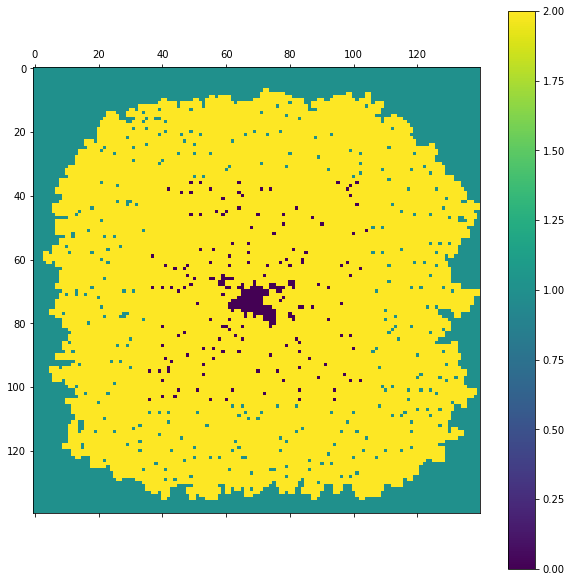

In [16]:
plt.matshow(np.vectorize(lambda x: 0 if x=="I" else 1 if x=="O" else 2)(grid));
plt.colorbar();
plt.rcParams["figure.figsize"] = (20,20);
# in_or_out(grid, 31,129), grid[31,129-1::-1]
# S_shape